In [53]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(172, 260, 1))  # adapt this if using `channels_first` image data format
#input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [36]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [58]:
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split

show_name = "chanel"
src_dir = "../img/%s" % show_name
input_files = [os.path.join(src_dir, f) for f in os.listdir(src_dir) if f.endswith(".jpg")]
imgs = [Image.open(im).convert('L').resize((260, 172), Image.ANTIALIAS) for im in input_files]
print(imgs[0])
lwf_immatrix = np.array([np.array(im) for im in imgs])
print("Input size", lwf_immatrix.shape)
lwf_immatrix = lwf_immatrix.astype('float32') / 255.
x_train, x_test, _, _ = train_test_split(lwf_immatrix, [0]*len(input_files), test_size=0.20, random_state=42)
x_train = np.reshape(x_train, (len(x_train), 172, 260, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 172, 260, 1))  # adapt this if using `channels_first` image data format
print("Input size", lwf_immatrix.shape)
print("x_train size", x_train.shape)
print("x_test size", x_test.shape)

<PIL.Image.Image image mode=L size=260x172 at 0x1C649E55F8>
Input size (83, 172, 260)
Input size (83, 172, 260)
x_train size (66, 172, 260, 1)
x_test size (17, 172, 260, 1)


In [59]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 66 samples, validate on 17 samples
Epoch 1/50
66/66 [==============================] - 6s 97ms/step - loss: 0.6773 - val_loss: 0.6647
Epoch 2/50
66/66 [==============================] - 6s 90ms/step - loss: 0.6669 - val_loss: 0.6704
Epoch 3/50
66/66 [==============================] - 6s 84ms/step - loss: 0.6724 - val_loss: 0.6566
Epoch 4/50
66/66 [==============================] - 6s 87ms/step - loss: 0.6587 - val_loss: 0.6522
Epoch 5/50
66/66 [==============================] - 6s 92ms/step - loss: 0.6544 - val_loss: 0.6500
Epoch 6/50
66/66 [==============================] - 5s 83ms/step - loss: 0.6524 - val_loss: 0.6495
Epoch 7/50
66/66 [==============================] - 5s 78ms/step - loss: 0.6520 - val_loss: 0.6530
Epoch 8/50
66/66 [==============================] - 5s 77ms/step - loss: 0.6554 - val_loss: 0.6690
Epoch 9/50
66/66 [==============================] - 5s 77ms/step - loss: 0.6710 - val_loss: 0.7125
Epoch 10/50
66/66 [==============================] - 5s 77ms/step

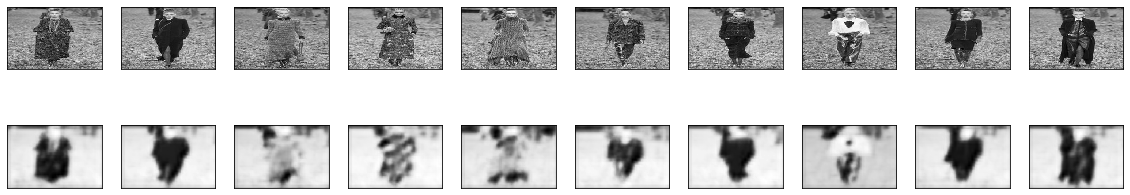

In [61]:
import matplotlib.pyplot as plt
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(172, 260))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(172, 260))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()